In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_5Y.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,09/16/2022,3873.33,--,3880.95,3880.95,3837.08
1,09/15/2022,3901.35,--,3932.41,3959.14,3888.28
2,09/14/2022,3946.01,--,3940.73,3961.94,3912.18
3,09/13/2022,3932.69,--,4037.12,4037.12,3921.28
4,09/12/2022,4110.41,--,4083.67,4119.28,4083.67
...,...,...,...,...,...,...
1253,09/25/2017,2496.66,--,2499.39,2502.54,2488.03
1254,09/22/2017,2502.22,--,2497.26,2503.47,2496.54
1255,09/21/2017,2500.60,--,2507.16,2507.16,2499.00
1256,09/20/2017,2508.24,--,2506.84,2508.85,2496.67


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,3378.254785,3378.078569,3397.710199,3356.390278
std,689.535001,689.510030,693.477229,685.199670
min,2237.400000,2290.710000,2300.730000,2191.860000
25%,2791.735000,2790.982500,2804.500000,2776.092500
50%,3116.125000,3116.050000,3128.675000,3100.215000
75%,4019.357500,4032.362500,4060.237500,3981.862500
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,3378.254785,3378.078569,3397.710199,3356.390278
std,689.535001,689.510030,693.477229,685.199670
min,2237.400000,2290.710000,2300.730000,2191.860000
25%,2791.735000,2790.982500,2804.500000,2776.092500
50%,3116.125000,3116.050000,3128.675000,3100.215000
75%,4019.357500,4032.362500,4060.237500,3981.862500
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1258 non-null   object 
 1   Close/Last  1258 non-null   float64
 2   Volume      1258 non-null   object 
 3   Open        1258 non-null   float64
 4   High        1258 non-null   float64
 5   Low         1258 non-null   float64
dtypes: float64(4), object(2)
memory usage: 68.8+ KB


In [5]:
df.shape

(1258, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

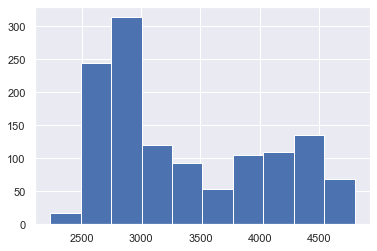

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3873.33

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3378.254785373609

In [10]:
close_sd = df['Close/Last'].std()
close_sd

689.5350007892554

In [11]:
sigma1 = close_mean + close_sd
sigma1

4067.7897861628644

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble
sigma2

4757.32478695212

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble
sigma2_5

5102.092287346748

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1258 non-null   datetime64[ns]
 1   Close/Last  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.5 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2017-09-19 to 2022-09-16')

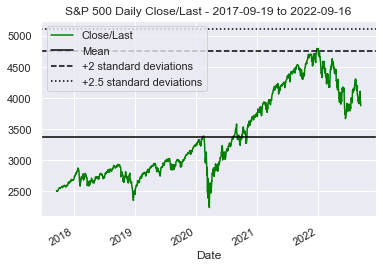

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2_5:
    c = 'red'
elif close_current > sigma2:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma2, color='black', linestyle='--', label='+2 standard deviations')
plt.axhline(sigma2_5, color='black', linestyle=':', label='+2.5 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2017-09-19 to 2022-09-16')

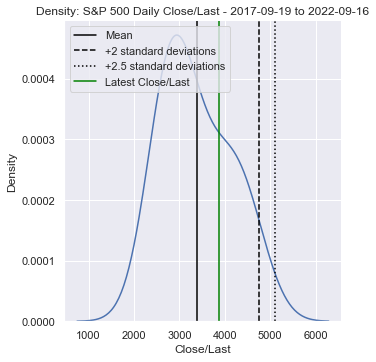

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma2, color='black', linestyle='--', label='+2 standard deviations')
plt.axvline(sigma2_5, color='black', linestyle=':', label='+2.5 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

0.7179841691280615